In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6


In [4]:
os.chdir("C:/Users//iamab//Desktop//Acmegrade DS//PROJECTS//Apr 23 DS Day16//Projects//PRJ Sales Forecasting")

In [5]:
dt = pd.read_csv('Train.csv')
display (dt.head())


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
print (dt.shape)

(8523, 12)


In [7]:
display (dt.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [8]:
display (dt.describe())

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
display (dt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


None

In [10]:
display(dt.apply(lambda x: len(x.unique())))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [11]:
display (dt.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
dt.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [13]:
cat_col =[]
for x in dt.dtypes.index:
    if dt.dtypes[x] == 'object':
        cat_col.append(x)
display(cat_col)        
    

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [14]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
display (cat_col)


['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [15]:
for col in cat_col:
    print (col , len(dt[col].unique()))

Item_Fat_Content 5
Item_Type 16
Outlet_Size 4
Outlet_Location_Type 3
Outlet_Type 4


In [16]:
for col in cat_col:
    print(col)
    print(dt[col].value_counts())
    print()
    print('*'*50)

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

**************************************************
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

**************************************************
Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

**************************************************
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: 

In [17]:
miss_bool = dt['Item_Weight'].isnull()
miss_bool.head(30)  


0     False
1     False
2     False
3     False
4     False
5     False
6     False
7      True
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18     True
19    False
20    False
21     True
22    False
23     True
24    False
25    False
26    False
27    False
28    False
29     True
Name: Item_Weight, dtype: bool

In [18]:
Item_Weight_null = dt[dt['Item_Weight'].isna()]
display(Item_Weight_null)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [19]:
item_weight_mean = dt.groupby('Item_Identifier')['Item_Weight'].mean().reset_index()
display(item_weight_mean)

,Item_Identifier,Item_Weight
0,DRA12,11.600
1,DRA24,19.350
2,DRA59,8.270
3,DRB01,7.390
4,DRB13,6.115
...,...,...
1554,NCZ30,6.590
1555,NCZ41,19.850
1556,NCZ42,10.500
1557,NCZ53,9.600


In [20]:
#here is tricky problem where we need to fill mean with matching records
#And there are 4 records which uniquely defined and doesn't have multiple records
#those records are filled with 0

for i, item in enumerate(dt['Item_Identifier']):
    if miss_bool[i]:
        matching_records = dt.loc[dt['Item_Identifier'] == item, 'Item_Weight']
        if matching_records.notnull().any():
            mean_weight = np.mean(matching_records[matching_records.notnull()])
            dt.loc[i, 'Item_Weight'] = mean_weight
        else:
            dt.loc[i, 'Item_Weight'] = 0

In [21]:
result = dt['Item_Weight'].isnull().sum()
display(result)

0

In [22]:

Item_Weight_null = dt['Item_Weight']
display (Item_Weight_null.head(50))


0      9.300
1      5.920
2     17.500
3     19.200
4      8.930
5     10.395
6     13.650
7     19.000
8     16.200
9     19.200
10    11.800
11    18.500
12    15.100
13    17.600
14    16.350
15     9.000
16    11.800
17     9.000
18     8.260
19    13.350
20    18.850
21     8.315
22    14.600
23    15.500
24    13.850
25    13.000
26     7.645
27    11.650
28     5.925
29    14.500
30    19.250
31    18.600
32    18.700
33    17.850
34    17.500
35    10.000
36    20.200
37     8.850
38     6.385
39    15.250
40    13.350
41     9.800
42    13.600
43    21.350
44    12.150
45     6.420
46    19.600
47    10.000
48    15.850
49    10.195
Name: Item_Weight, dtype: float64

In [23]:
result = dt.groupby('Outlet_Size').agg({'Outlet_Size': np.size})
result
    

,Outlet_Size
Outlet_Size,
High,932
Medium,2793
Small,2388


In [24]:
result= dt['Outlet_Size'].isnull().sum()
display (result)


2410

In [25]:
dt['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [26]:
Outlet_Size_null= dt[dt['Outlet_Size'].isna()]
display (Outlet_Size_null)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [27]:

result = Outlet_Size_null['Outlet_Type'].value_counts()
display (result)


Supermarket Type1    1855
Grocery Store         555
Name: Outlet_Type, dtype: int64

In [28]:
result= dt.groupby (['Outlet_Type','Outlet_Size'] ).agg({'Outlet_Type':[np.size]})
display (result)


Outlet_Type
                                     size
Outlet_Type       Outlet_Size            
Grocery Store     Small               528
Supermarket Type1 High                932
                  Medium              930
                  Small              1860
Supermarket Type2 Medium              928
Supermarket Type3 Medium              935

In [29]:
outlet_size_mode = dt.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
display (outlet_size_mode)


Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [30]:
miss_bool = dt['Outlet_Size'].isnull()
dt.loc[miss_bool, 'Outlet_Size'] = dt.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])


In [31]:

display (dt['Outlet_Size'].isnull().sum())

0

In [32]:
result = dt.groupby (['Outlet_Type','Outlet_Size'] ).agg({'Outlet_Type':[np.size]})
display (result)


Outlet_Type
                                     size
Outlet_Type       Outlet_Size            
Grocery Store     Small              1083
Supermarket Type1 High                932
                  Medium              930
                  Small              3715
Supermarket Type2 Medium              928
Supermarket Type3 Medium              935

In [33]:
display (sum(dt['Item_Visibility']==0))

526

In [34]:
dt.loc[:,"Item_Visibility"].replace([0],[dt['Item_Visibility'].mean()],inplace= True)

In [35]:
sum(dt['Item_Visibility']==0)

0

In [36]:
display (sum(dt['Item_Visibility']==0))

0

In [37]:
dt['Item_Fat_Content'] = dt['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
result = dt['Item_Fat_Content'].value_counts()
display (result)


Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [38]:
dt['New_Item_Type'] = dt['Item_Identifier'].apply(lambda x: x[:2])
display (dt['New_Item_Type'])


0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [39]:
display (dt['New_Item_Type'].value_counts())

FD    6125
NC    1599
DR     799
Name: New_Item_Type, dtype: int64

In [40]:
dt['New_Item_Type'] = dt['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
display (dt['New_Item_Type'].value_counts())



Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [41]:
display (dt['Item_Fat_Content'].value_counts())

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [42]:
result = dt.groupby (['New_Item_Type','Item_Fat_Content'] ).agg({'Outlet_Type':[np.size]})
display (result)


Outlet_Type
                                       size
New_Item_Type  Item_Fat_Content            
Drinks         Low Fat                  728
               Regular                   71
Food           Low Fat                 3190
               Regular                 2935
Non-Consumable Low Fat                 1599

In [43]:
 dt.loc[dt['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
result =  (dt['Item_Fat_Content'].value_counts())
display (result) 


Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [44]:
result = dt.groupby (['New_Item_Type','Item_Fat_Content'] ).agg({'Outlet_Type':[np.size]})
display (result)


Outlet_Type
                                       size
New_Item_Type  Item_Fat_Content            
Drinks         Low Fat                  728
               Regular                   71
Food           Low Fat                 3190
               Regular                 2935
Non-Consumable Non-Edible              1599

In [45]:
dt['Outlet_Years'] = 2023 - dt['Outlet_Establishment_Year']
print (dt['Outlet_Years'])


0       24
1       14
2       24
3       25
4       36
        ..
8518    36
8519    21
8520    19
8521    14
8522    26
Name: Outlet_Years, Length: 8523, dtype: int64


In [46]:
display (dt.head(50))

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,24
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,14
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,24
3,FDX07,19.200,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,25
4,NCD19,8.930,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,36
5,FDP36,10.395,Regular,0.066132,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,Food,14
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,Food,36
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,Food,38
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986,Food,21
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350,Food,16


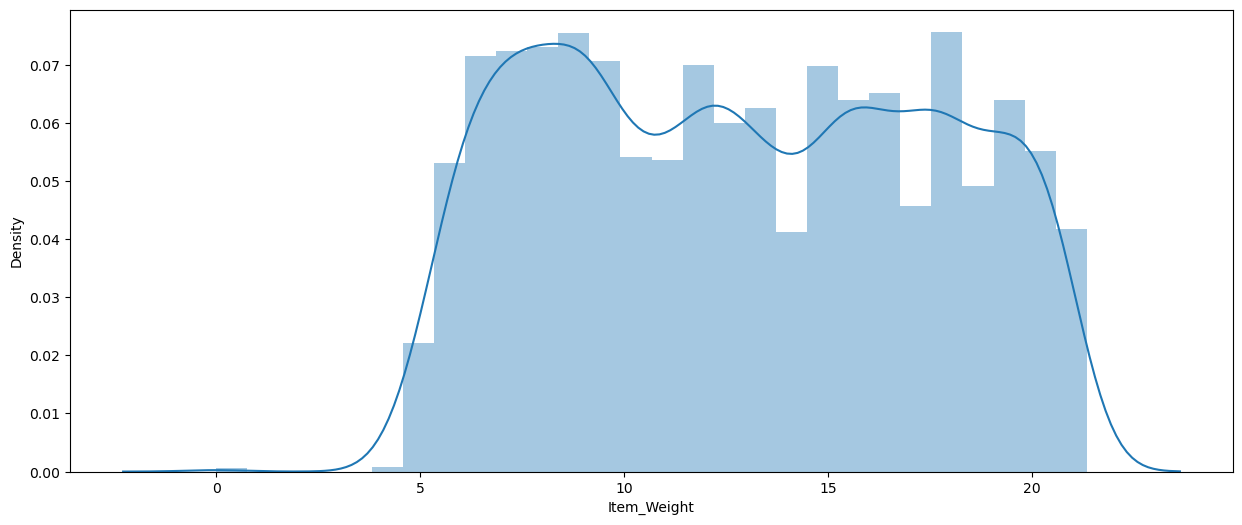

In [47]:
sns.distplot(dt['Item_Weight'])
plt.show()


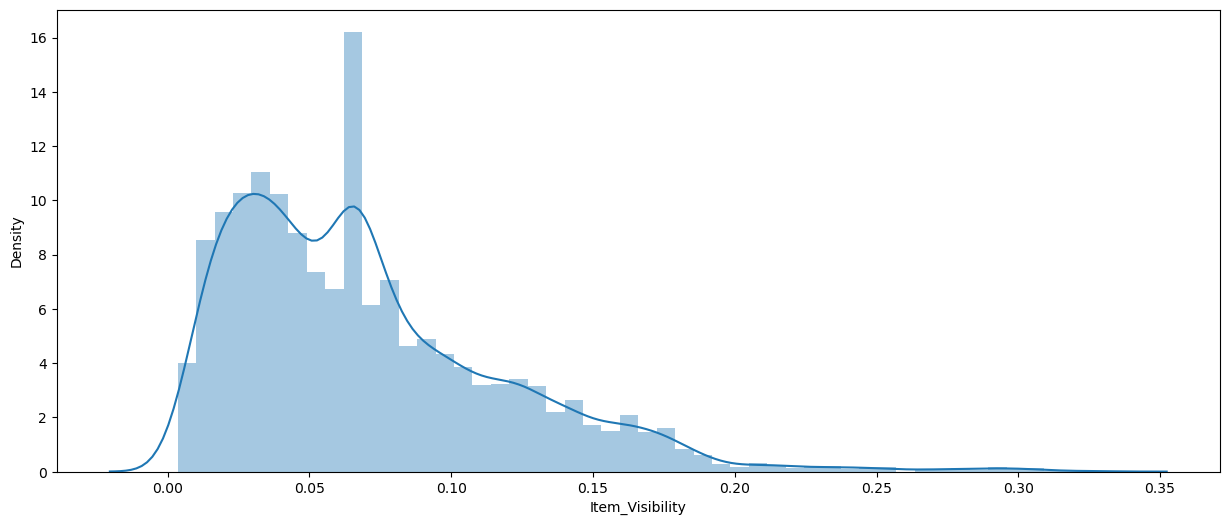

In [48]:
sns.distplot(dt['Item_Visibility'])
plt.show()


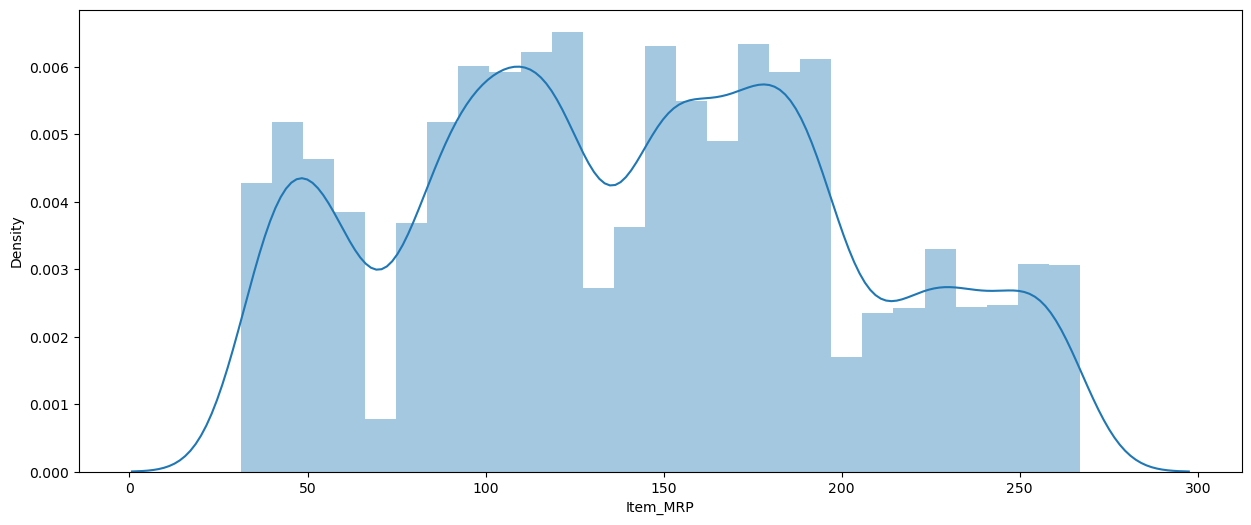

In [49]:
sns.distplot(dt['Item_MRP'])
plt.show()


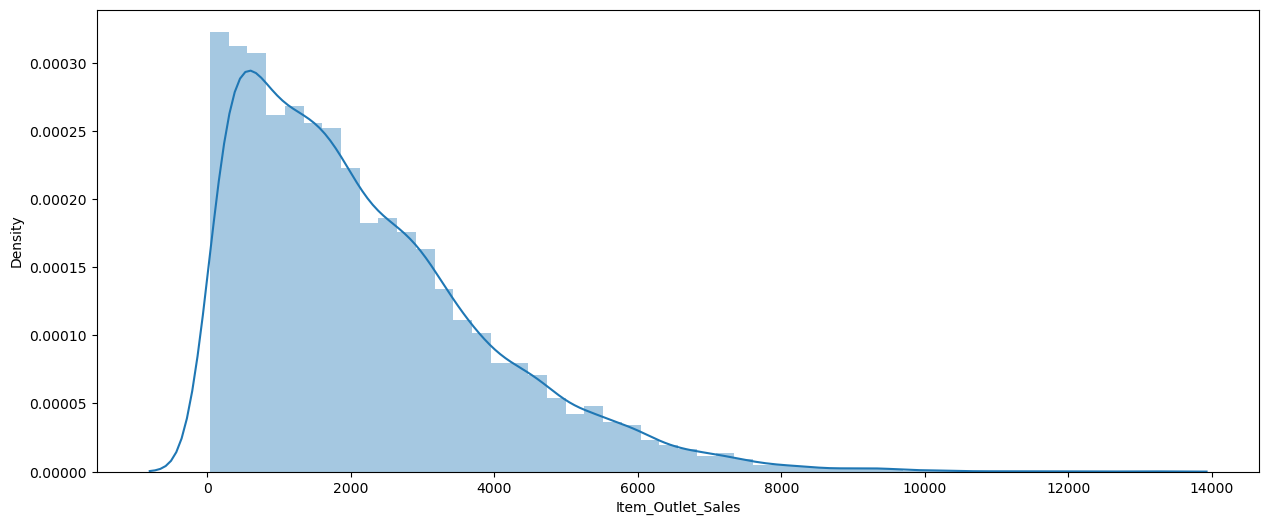

In [50]:
sns.distplot(dt['Item_Outlet_Sales'])
plt.show()


In [51]:
dt['Item_Outlet_Sales'] = np.log(1+dt['Item_Outlet_Sales'])
display (dt['Item_Outlet_Sales'])


0       8.225808
1       6.096776
2       7.648868
3       6.597664
4       6.903451
          ...   
8518    7.929984
8519    6.310436
8520    7.085159
8521    7.521100
8522    6.642056
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

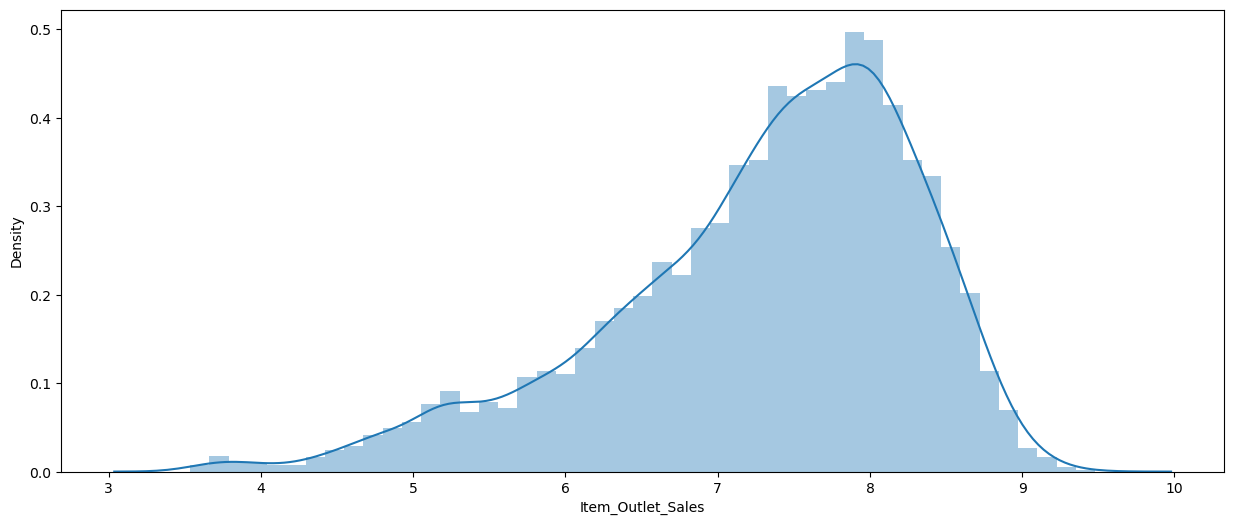

In [52]:
sns.distplot(dt['Item_Outlet_Sales'])
plt.show()

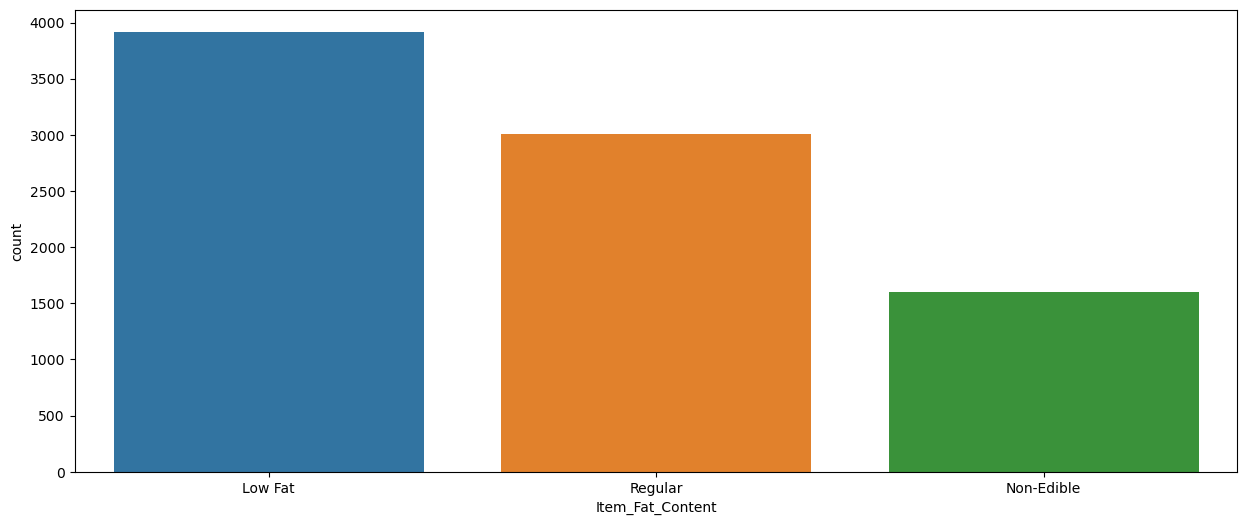

In [53]:
sns.countplot(x = dt["Item_Fat_Content"])
plt.show()


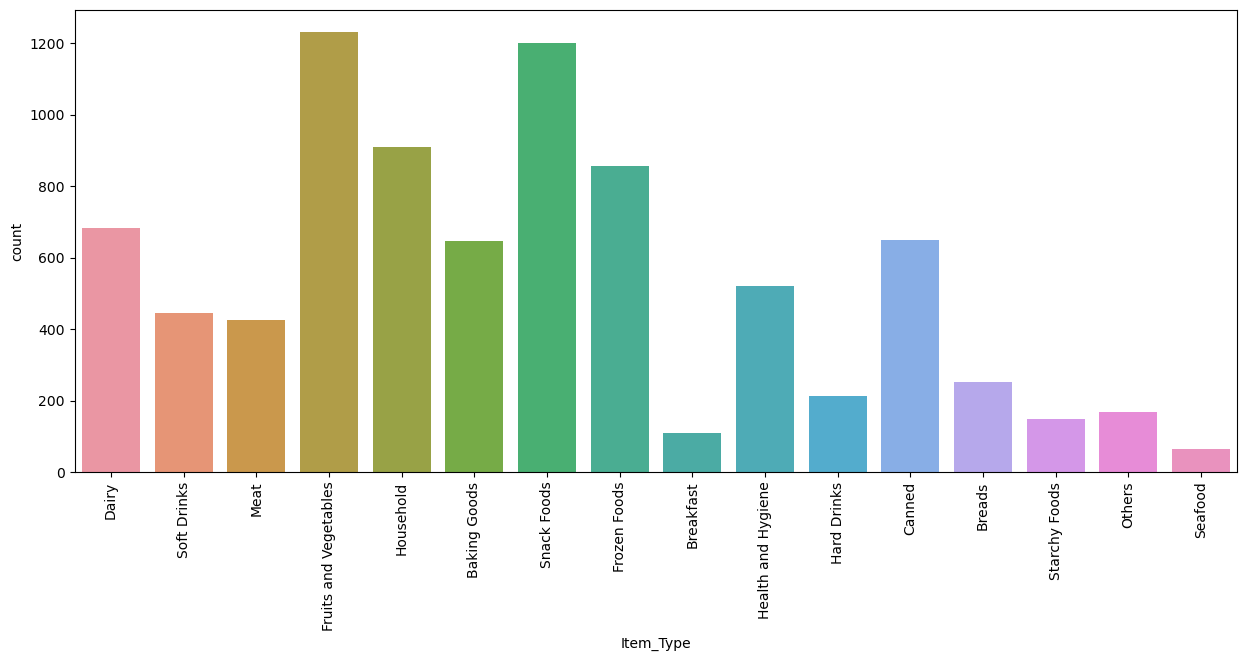

In [54]:
l = list(dt['Item_Type'].unique()) 
chart = sns.countplot(x =dt["Item_Type"])
chart.set_xticklabels(labels=l, rotation=90)
plt.show()


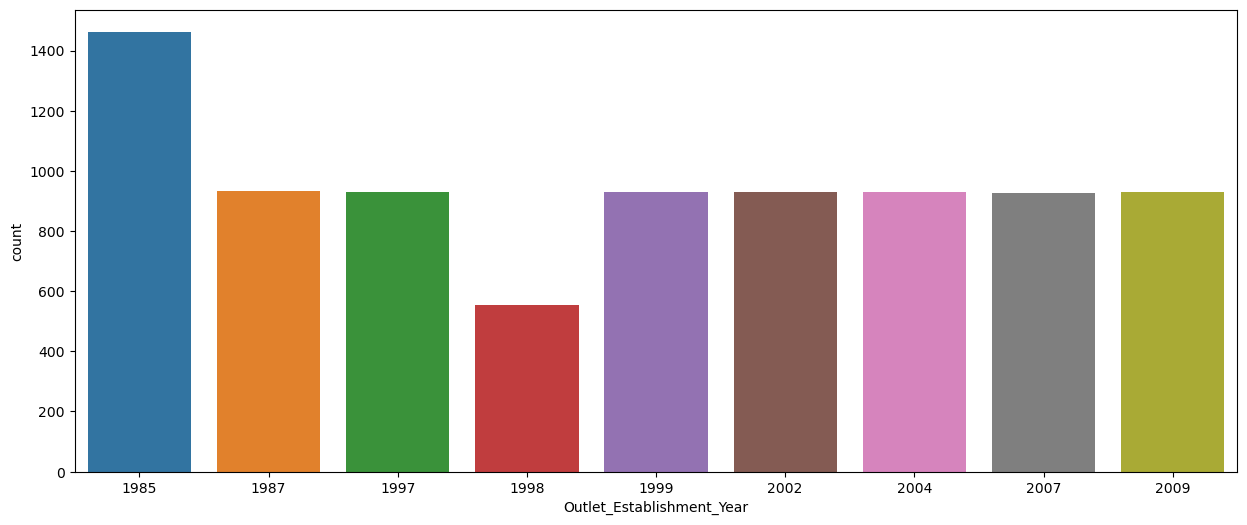

In [55]:
sns.countplot(x= dt['Outlet_Establishment_Year'])
plt.show()


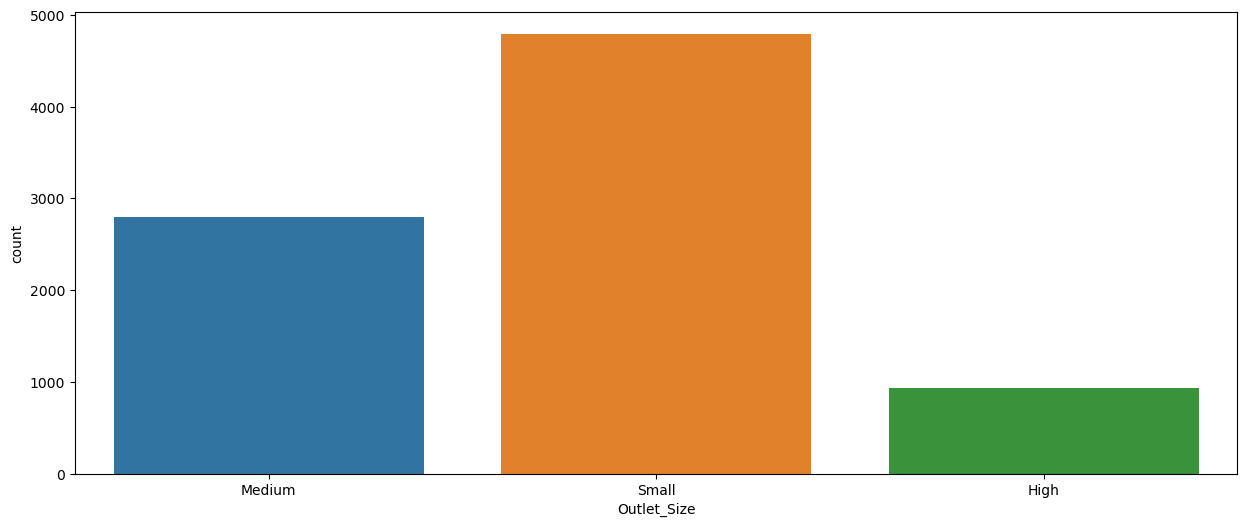

In [56]:
sns.countplot(x=dt['Outlet_Size'])
plt.show()


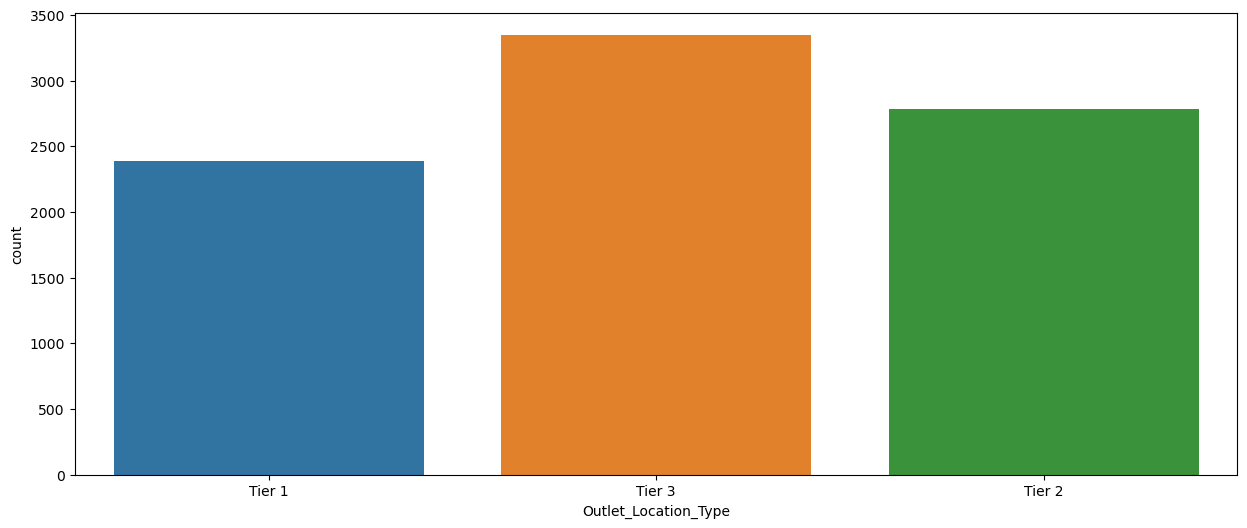

In [57]:
sns.countplot(x=dt['Outlet_Location_Type'])
plt.show()


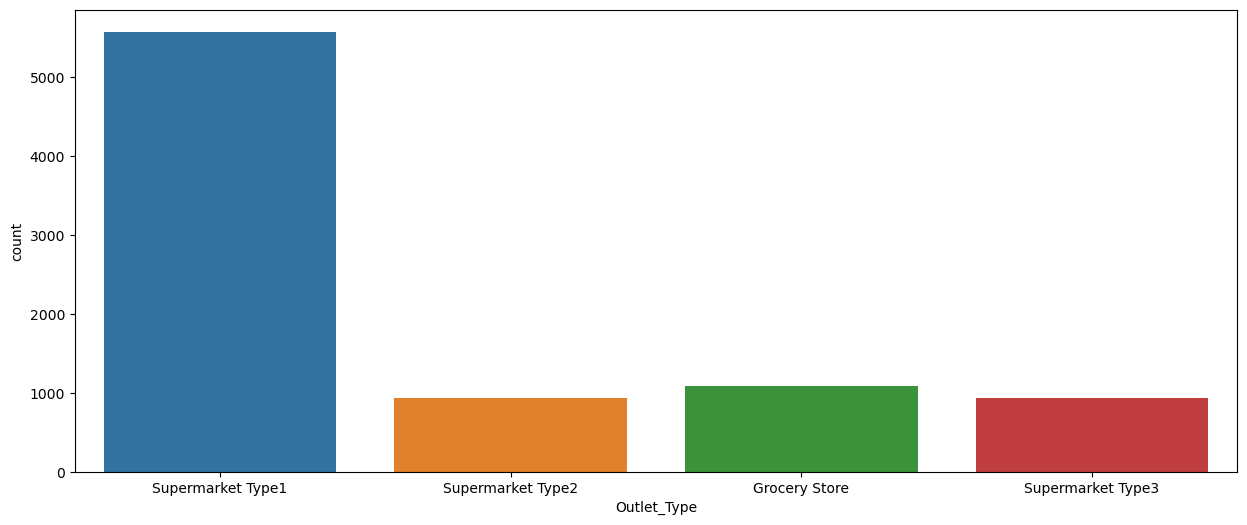

In [58]:
sns.countplot(x= dt['Outlet_Type'])
plt.show()


In [59]:
corr = dt.corr()
display (corr)


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years
Item_Weight,1.000000,-0.018452,0.026691,-0.011404,0.007816,0.011404
Item_Visibility,-0.018452,1.000000,-0.005259,-0.078355,-0.202466,0.078355
Item_MRP,0.026691,-0.005259,1.000000,0.005020,0.509886,-0.005020
Outlet_Establishment_Year,-0.011404,-0.078355,0.005020,1.000000,0.077032,-1.000000
Item_Outlet_Sales,0.007816,-0.202466,0.509886,0.077032,1.000000,-0.077032
Outlet_Years,0.011404,0.078355,-0.005020,-1.000000,-0.077032,1.000000


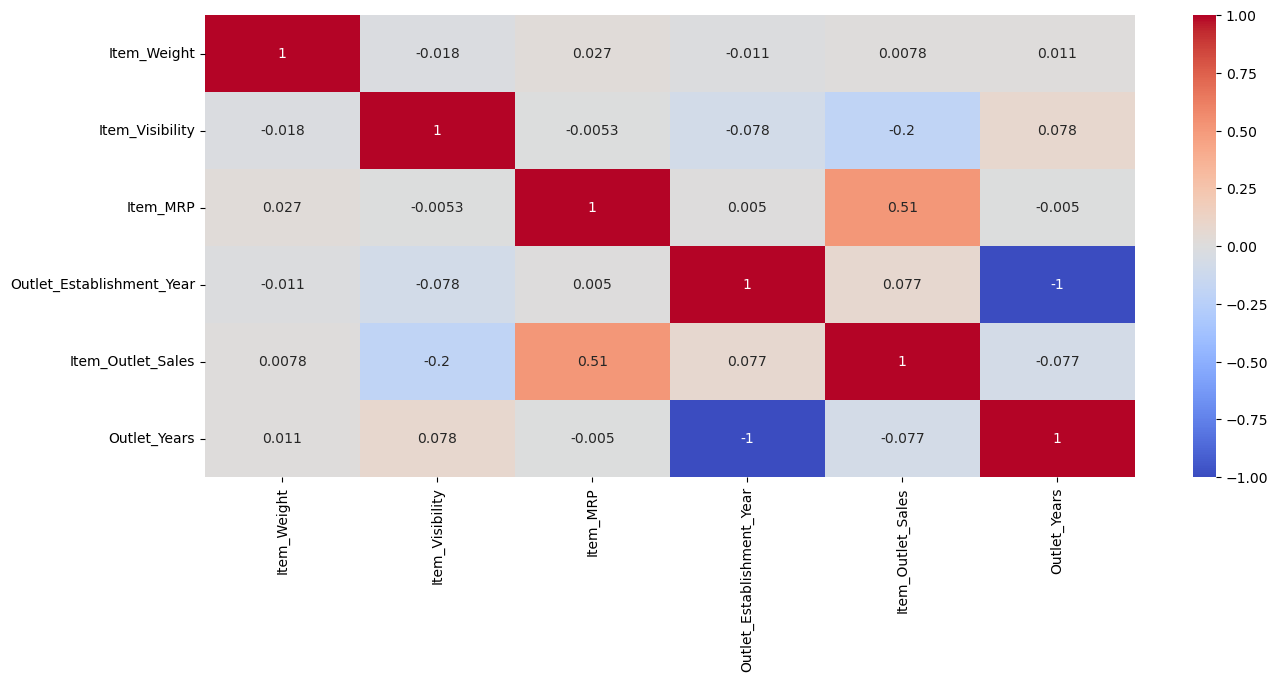

In [60]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


In [61]:
display (dt.head())

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,Food,24
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,Drinks,14
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868,Food,24
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,6.597664,Food,25
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.903451,Non-Consumable,36


In [62]:
#labelencoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dt['Outlet'] = le.fit_transform(dt['Outlet_Identifier'])
display (dt['Outlet'])


0       9
1       3
2       9
3       0
4       1
       ..
8518    1
8519    7
8520    6
8521    3
8522    8
Name: Outlet, Length: 8523, dtype: int32

In [63]:
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']
for col in cat_col:
    dt[col] = le.fit_transform(dt[col])
display (dt.head())   


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years,Outlet
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,8.225808,1,24,9
1,DRC01,5.92,2,0.019278,14,48.2692,OUT018,2009,1,2,2,6.096776,0,14,3
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,7.648868,1,24,9
3,FDX07,19.20,2,0.066132,6,182.0950,OUT010,1998,2,2,0,6.597664,1,25,0
4,NCD19,8.93,1,0.066132,9,53.8614,OUT013,1987,0,2,1,6.903451,2,36,1


In [64]:
dt = pd.get_dummies(dt, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])
display (dt.head())


,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Outlet,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,8.225808,24,9,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,6.096776,14,3,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,7.648868,24,9,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.066132,6,182.0950,OUT010,1998,6.597664,25,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.066132,9,53.8614,OUT013,1987,6.903451,36,1,...,0,0,1,0,1,0,0,0,0,1


In [65]:
dt

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Outlet,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDA15,9.300,0.016047,4,249.8092,OUT049,1999,8.225808,24,9,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.920,0.019278,14,48.2692,OUT018,2009,6.096776,14,3,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.500,0.016760,10,141.6180,OUT049,1999,7.648868,24,9,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.200,0.066132,6,182.0950,OUT010,1998,6.597664,25,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.930,0.066132,9,53.8614,OUT013,1987,6.903451,36,1,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0.056783,13,214.5218,OUT013,1987,7.929984,36,1,...,0,0,1,0,1,0,0,0,1,0
8519,FDS36,8.380,0.046982,0,108.1570,OUT045,2002,6.310436,21,7,...,0,1,0,0,1,0,0,0,1,0
8520,NCJ29,10.600,0.035186,8,85.1224,OUT035,2004,7.085159,19,6,...,0,1,0,0,1,0,0,0,0,1
8521,FDN46,7.210,0.145221,13,103.1332,OUT018,2009,7.521100,14,3,...,0,0,1,0,0,1,0,0,1,0


In [66]:
X = dt.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
X.head(90)


,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Years,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Size_0,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,9.300,0.016047,4,249.8092,24,9,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,5.920,0.019278,14,48.2692,14,3,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
2,17.500,0.016760,10,141.6180,24,9,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,19.200,0.066132,6,182.0950,25,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
4,8.930,0.066132,9,53.8614,36,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,15.500,0.126399,6,177.0028,16,2,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
86,6.055,0.025404,6,160.9920,19,6,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
87,20.200,0.039058,2,155.9630,38,5,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
88,6.305,0.123116,13,95.6436,26,8,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0


In [67]:
# Assuming X is a DataFrame or Series
nan_check = X.isna().any().any()


if nan_check:
    print("There are NaN values in X")
else:
    print("There are no NaN values in X")

There are no NaN values in X


In [68]:
nan_records = X[X.isnull().any(axis=1)]
print(nan_records)

Empty DataFrame
Columns: [Item_Weight, Item_Visibility, Item_Type, Item_MRP, Outlet_Years, Outlet, Item_Fat_Content_0, Item_Fat_Content_1, Item_Fat_Content_2, Outlet_Size_0, Outlet_Size_1, Outlet_Size_2, Outlet_Location_Type_0, Outlet_Location_Type_1, Outlet_Location_Type_2, Outlet_Type_0, Outlet_Type_1, Outlet_Type_2, Outlet_Type_3, New_Item_Type_0, New_Item_Type_1, New_Item_Type_2]
Index: []

[0 rows x 22 columns]


In [69]:
y = dt['Item_Outlet_Sales']
y.head()


0    8.225808
1    6.096776
2    7.648868
3    6.597664
4    6.903451
Name: Item_Outlet_Sales, dtype: float64

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print (X.shape, y.shape)
print (X_train.shape, X_test.shape ,  y_train.shape, y_test.shape)


(8523, 22) (8523,)
(5966, 22) (2557, 22) (5966,) (2557,)


In [71]:
from sklearn.metrics import SCORERS
SCORERS.keys()


dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'positive_likelihood_ratio', 'neg_negative_likelihood_ratio', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weig

In [72]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def train(model, X, y):
    # training the model
    model.fit(X, y)
    
    pred = model.predict(X)
    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    print("Model Report")
    print ('Scoring - neg_mean_squared_error')
    print ( cv_score )    
    cv_score = np.abs(np.mean(cv_score))    
    print ('ABS Average of - neg_mean_squared_error',cv_score )       
    cv_score = cross_val_score(model, X, y,  cv=5)
    print ()
    print ('R2 Score ')
    print ( cv_score )    
    cv_score = np.mean(cv_score)     
    print ('Average R2 Score ',cv_score)    
    print ()
    print ('Accuracy for full Data')
    print('R2_Score:', r2_score(y,pred))
    print ()


Model Report
Scoring - neg_mean_squared_error
[-0.29232404 -0.27414159 -0.28704311 -0.28465286 -0.28182623]
ABS Average of - neg_mean_squared_error 0.2839975670330338

R2 Score 
[0.69575662 0.7315253  0.7157747  0.73449908 0.72756358]
Average R2 Score  0.7210238569264271

Accuracy for full Data
R2_Score: 0.7230304698244023

Outlet_Size_2            -4.891489e+12
Outlet_Size_1            -4.634607e+12
Outlet_Size_0            -3.046555e+12
Outlet_Type_1            -2.974081e+12
Outlet_Type_0            -2.083605e+12
Outlet_Type_2            -1.960253e+12
Outlet_Type_3            -1.944546e+12
Outlet_Years             -6.208812e-01
Item_Weight              -8.664197e-03
Item_Visibility          -5.669904e-03
Item_Type                -2.426800e-03
Outlet                    1.781747e-01
Item_MRP                  5.100586e-01
Item_Fat_Content_1        6.195987e+11
Outlet_Location_Type_0    1.129591e+12
Outlet_Location_Type_1    1.167314e+12
Outlet_Location_Type_2    1.218718e+12
Item_Fat_Co

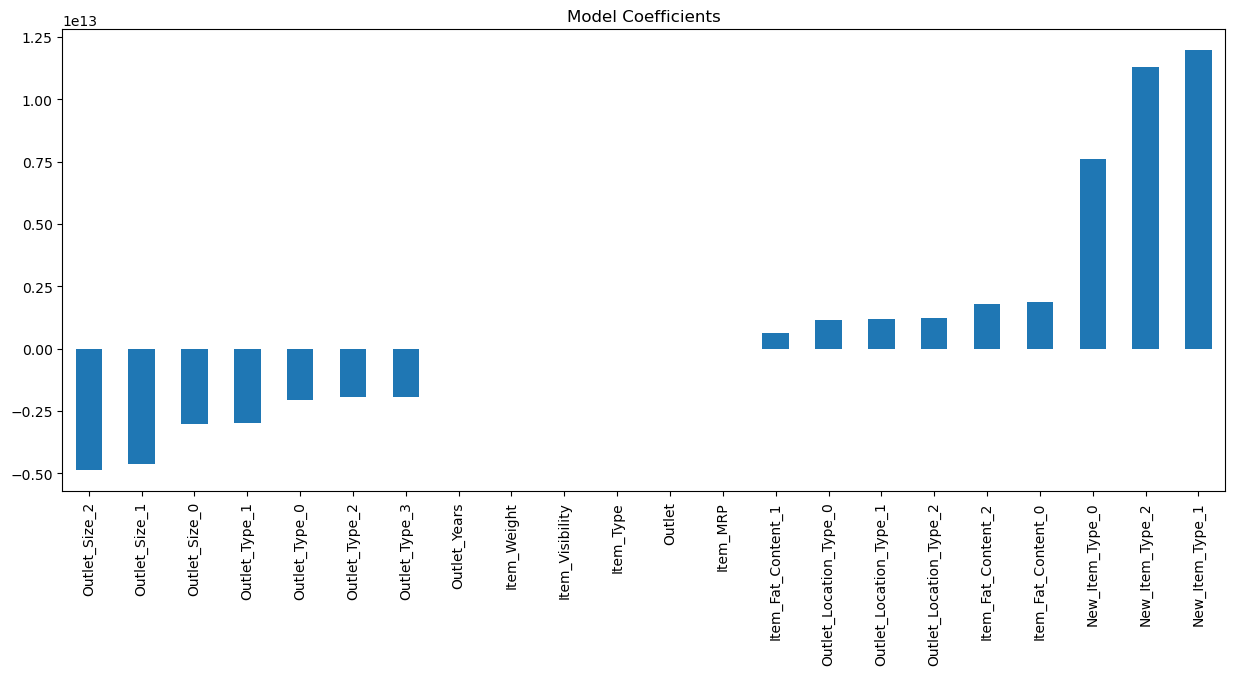

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


model = LinearRegression()
train(model, X_train_scaled, y_train)


coef = pd.Series(model.coef_, X.columns).sort_values()
print(coef)

coef.plot(kind='bar', title="Model Coefficients")
plt.show()

Model Report
Scoring - neg_mean_squared_error
[-0.29250678 -0.27392827 -0.28670686 -0.28443782 -0.28163446]
ABS Average of - neg_mean_squared_error 0.28384283812465394

R2 Score 
[0.69556644 0.73173421 0.71610765 0.73469966 0.72774895]
Average R2 Score  0.7211713819816756

Accuracy for full Data
R2_Score: 0.7232280596104625



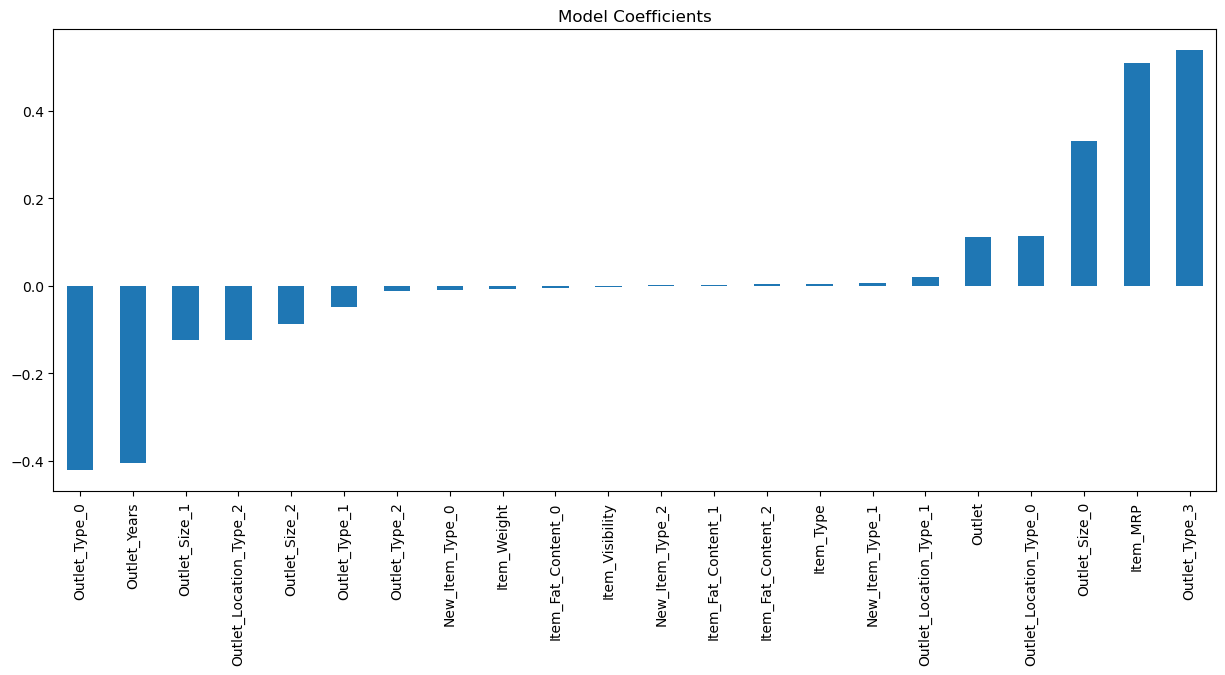

In [74]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
model = Ridge()
train(model, X_train_scaled, y_train)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")
plt.show()


Model Report
Scoring - neg_mean_squared_error
[-0.96115509 -1.02125043 -1.00996446 -1.0732286  -1.03761845]
ABS Average of - neg_mean_squared_error 1.0206434065523833

R2 Score 
[-3.45600767e-04 -1.39769568e-04 -4.99432584e-05 -1.01990036e-03
 -3.04736638e-03]
Average R2 Score  -0.0009205160673833923

Accuracy for full Data
R2_Score: 0.0



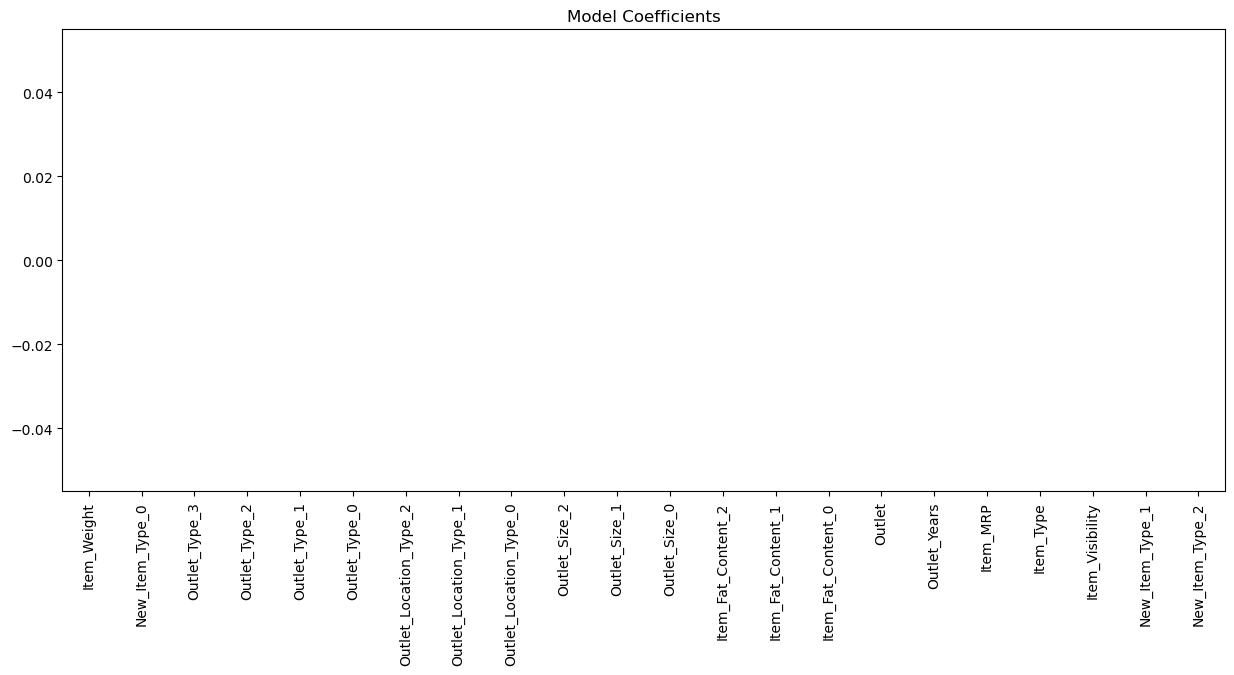

In [75]:
model = Lasso()
train(model, X_train_scaled, y_train)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")
plt.show()


Model Report
Scoring - neg_mean_squared_error
[-0.55457    -0.54809271 -0.54774494 -0.55439067 -0.54889511]
ABS Average of - neg_mean_squared_error 0.5507386826804591

R2 Score 
[0.41276195 0.45884822 0.46460116 0.48731935 0.45692219]
Average R2 Score  0.45609057159276734

Accuracy for full Data
R2_Score: 1.0



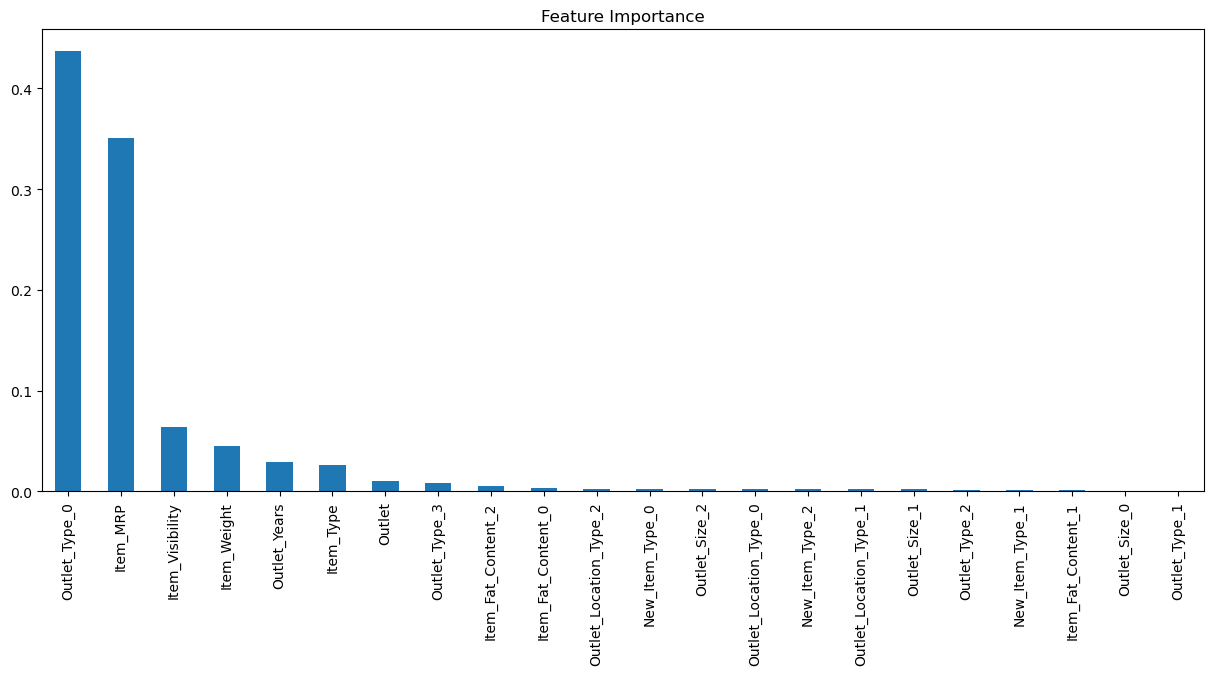

In [76]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model,X_train, y_train)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()


Model Report
Scoring - neg_mean_squared_error
[-0.30821519 -0.28187597 -0.30770614 -0.29329382 -0.3069044 ]
ABS Average of - neg_mean_squared_error 0.2995991034887286

R2 Score 
[0.67564743 0.72378358 0.69860927 0.72965668 0.70705229]
Average R2 Score  0.7069498484666361

Accuracy for full Data
R2_Score: 0.9599513939612799



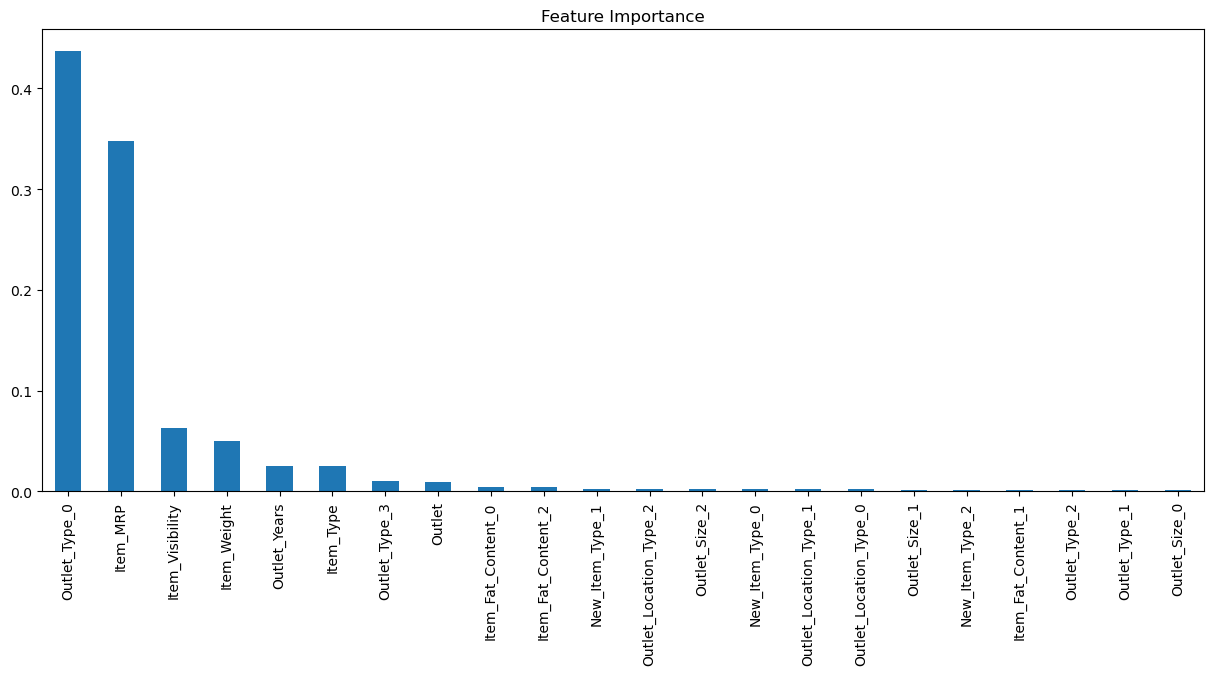

In [86]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, X_train, y_train)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model, X_train, y_train)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()


In [ ]:
!pip install xgboost

In [ ]:
!pip install lightgbm

In [80]:
from sklearn.model_selection import RandomizedSearchCV

In [81]:
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]


In [82]:
random_grid = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)


{'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [83]:
rf = RandomForestRegressor()
rf=RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
display (rf.fit(X_train, y_train))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.5s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   1.7s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   1.8s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   1.9s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   1.8s
[CV] END max_depth=5

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [84]:
print(rf.best_params_)
print(rf.best_score_)
predictions=rf.predict(X_test)
display (r2_score (y_test,predictions))
display (predictions)         


{'min_samples_split': 100, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 5}
-0.268806647582145


0.7257767553007708

array([7.70215918, 7.58212996, 7.5469911 , ..., 7.4718824 , 7.67871019,
       7.85347829])

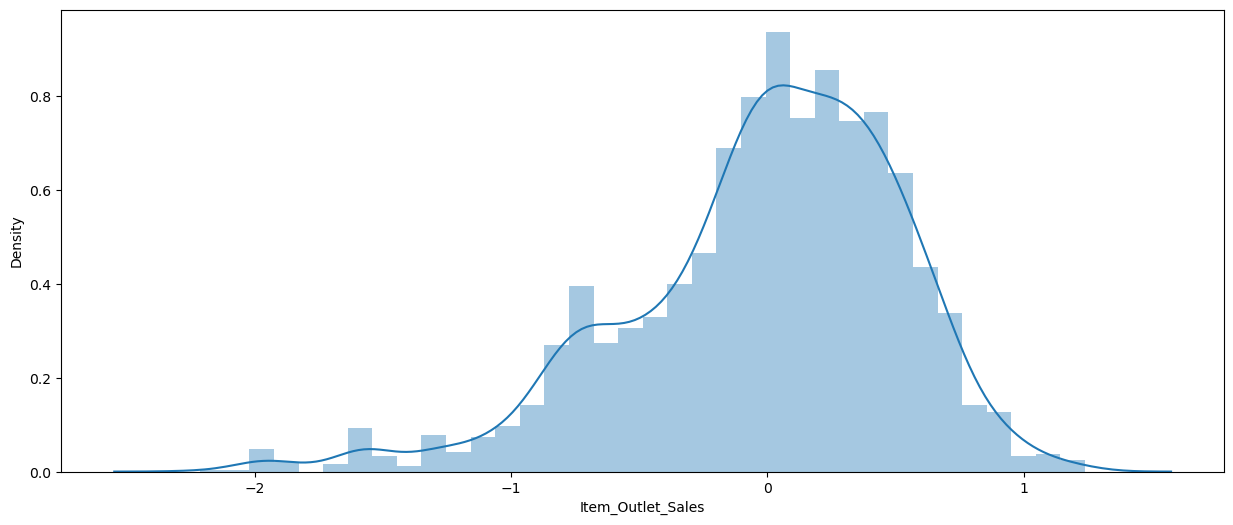

In [85]:
sns.distplot(y_test-predictions)
plt.show()


In [89]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

params = {
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3),
    "max_depth": randint(2, 6),
    "n_estimators": randint(100, 150),
    "subsample": uniform(0.6, 0.4)
}

xgb = RandomizedSearchCV(estimator=XGBRegressor(), param_distributions=params,
                         scoring='neg_mean_squared_error', n_iter=10, cv=5, verbose=2,
                         random_state=42, n_jobs=1)
xgb.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.5s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.4s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.4s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.3s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.3s
[CV] END gamma=0.07800932022121826, learning_rate=0.07679835610086079, max_depth=4, n_estimators=110, subsample=0.9464704583099741; total time=   0.4s
[CV] END gamma=0.07800932022121826, le

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001F3391829B0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F339D744F0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F339CC7430>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001F339D74370>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [90]:
print(xgb.best_params_)
print(xgb.best_score_)
predictions=xgb.predict(X_test)
display (r2_score (y_test,predictions))
display (predictions)


{'gamma': 0.22007624686980065, 'learning_rate': 0.06661147045343364, 'max_depth': 2, 'n_estimators': 107, 'subsample': 0.6137554084460873}
-0.2703404081786467


0.7397080018229896

array([7.737992 , 7.437711 , 7.503623 , ..., 7.372782 , 7.731409 ,
       7.8547406], dtype=float32)

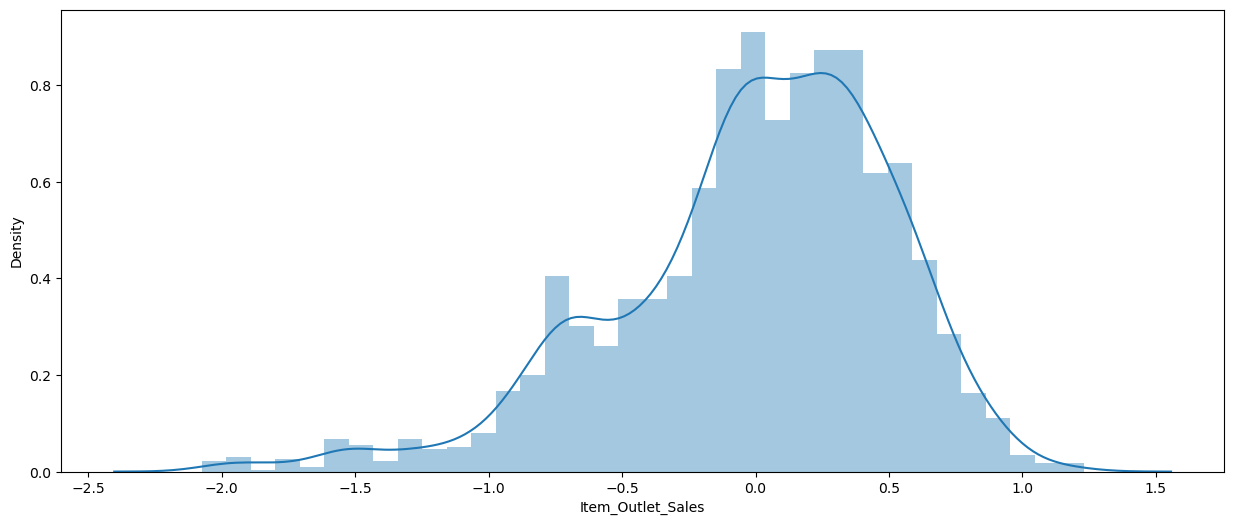

In [91]:
sns.distplot(y_test-predictions)
plt.show()
